# LLMs for Production

## 1. Applications with LLMs



- Summarization
- Sentiment Analysis
- Translation
- Zero-shot classificattion
- Few-shot Learning

#### Learning Objectives
1. Use a variety of existing models for a variety of existing applications
2. Understand basic prompt engineering
3. Understand Search vs. Sampling for inference
4. Get familiar wiht the Hugging Face abstractions: datasets, pipelines, tokenizers, models


In [ ]:
# install translation model
#!pip install sacremoses==0.0.53

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 880.6/880.6 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sacremoses: filename=sacremoses-0.0.53-py3-none-any.whl size=895241 sha256=4b7fc04691fd9bf800d6b92be3dfd5f5b9d59debd9806c5cafc7dfe800eed7a4
  Stored in directory: /root/.cache/pip/wheels/00/24/97/a2ea5324f36bc626e1ea0267f33db6aa80d157ee977e9e42fb
Successfully built sacremoses


In [ ]:
#!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset
from transformers import pipeline

### 1.1 Summarization task
Two types:
- extractive - select representative excerpts form the text
- abstractive - generate novel text summaries

Here:  
**Data** - "xsum" dataset that provides BBC articles and summaries  
**Model** - "t5-small" model (60M param, encoder-decoder model, supports sumamrization, Q&A, translation and text classification)

In [ ]:
xsum_dataset = load_dataset(
    "xsum", version="1.2.0", #cache_dir=DA.paths.datasets
    ) # when using Databricks, specify cache_dir to use predownloaded data
xsum_dataset

README.md:   0%|          | 0.00/6.24k [00:00<?, ?B/s]

xsum.py:   0%|          | 0.00/5.76k [00:00<?, ?B/s]

The repository for xsum contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/xsum.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


(…)SUM-EMNLP18-Summary-Data-Original.tar.gz:   0%|          | 0.00/255M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/204045 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/11332 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/11334 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 204045
    })
    validation: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11332
    })
    test: Dataset({
        features: ['document', 'summary', 'id'],
        num_rows: 11334
    })
})

In [ ]:
xsum_sample = xsum_dataset['train'].select(range(10))
display(xsum_sample.to_pandas())

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984
5,Simone Favaro got the crucial try with the las...,Defending Pro12 champions Glasgow Warriors bag...,34540833
6,"Veronica Vanessa Chango-Alverez, 31, was kille...",A man with links to a car that was involved in...,20836172
7,Belgian cyclist Demoitie died after a collisio...,Welsh cyclist Luke Rowe says changes to the sp...,35932467
8,"Gundogan, 26, told BBC Sport he ""can see the f...",Manchester City midfielder Ilkay Gundogan says...,40758845
9,The crash happened about 07:20 GMT at the junc...,A jogger has been hit by an unmarked police ca...,30358490


Use Hugging Face "pipeline" tool to load pre-trained model.

In [ ]:
summarizer = pipeline(
    task="summarization",
    model="t5-small",
    min_length=20,
    max_length=40,
    truncation=True,
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

In [ ]:
summarizer(xsum_sample["document"][0])

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire remain badly affected by standing water . a flood alert remains in place across the'}]

In [ ]:
xsum_sample["summary"][0]

'Clean-up operations are continuing across the Scottish Borders and Dumfries and Galloway after flooding caused by Storm Frank.'

In [ ]:
results = summarizer(xsum_sample["document"])

In [ ]:
type(results)

list

In [ ]:
results

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire remain badly affected by standing water . a flood alert remains in place across the'},
 {'summary_text': 'a fire alarm went off at the Holiday Inn in Hope Street on Saturday . guests were asked to leave the hotel . the two buses were parked side-by-side in'},
 {'summary_text': 'Sebastian Vettel will start third ahead of team-mate Kimi Raikkonen . stewards only handed Hamilton a reprimand after governing body said "n'},
 {'summary_text': 'the 67-year-old is accused of committing the offences between March 1972 and October 1989 . he denies all the charges, including two counts of indecency'},
 {'summary_text': 'a man receiving psychiatric treatment at the clinic threatened to shoot himself and others . the incident comes amid tension in Istanbul following several attacks in crowded areas .'},
 {'summary_text': 'Gregor Townsend gave a debut to powerhouse wing Taqele Naiyaravor

In [ ]:
import pandas as pd

In [ ]:
display(pd.DataFrame.from_dict(results).rename({"summary_text":"generated_summary"},axis=1).join(
    pd.DataFrame.from_dict(xsum_sample))[["generated_summary","summary","document"]]
)

,generated_summary,summary,document
0,the full cost of damage in Newton Stewart is s...,Clean-up operations are continuing across the ...,"The full cost of damage in Newton Stewart, one..."
1,a fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,A fire alarm went off at the Holiday Inn in Ho...
2,Sebastian Vettel will start third ahead of tea...,Lewis Hamilton stormed to pole position at the...,Ferrari appeared in a position to challenge un...
3,the 67-year-old is accused of committing the o...,A former Lincolnshire Police officer carried o...,"John Edward Bates, formerly of Spalding, Linco..."
4,a man receiving psychiatric treatment at the c...,An armed man who locked himself into a room at...,Patients and staff were evacuated from Cerahpa...
5,Gregor Townsend gave a debut to powerhouse win...,Defending Pro12 champions Glasgow Warriors bag...,Simone Favaro got the crucial try with the las...
6,"Veronica Vanessa Chango-Alverez, 31, was kille...",A man with links to a car that was involved in...,"Veronica Vanessa Chango-Alverez, 31, was kille..."
7,the 25-year-old was hit by a motorbike during ...,Welsh cyclist Luke Rowe says changes to the sp...,Belgian cyclist Demoitie died after a collisio...
8,gundogan will not be fit for the start of the ...,Manchester City midfielder Ilkay Gundogan says...,"Gundogan, 26, told BBC Sport he ""can see the f..."
9,the crash happened about 07:20 GMT at the junc...,A jogger has been hit by an unmarked police ca...,The crash happened about 07:20 GMT at the junc...


### 1.2 Sentiment Analysis task
A text classification task to determine the sentiment of a piece of text to be negative, positive, or some other defined label.

Here:  
**Data** - poem sentiment dataset that provides lines of poems tagged with negative (0), positive(1), no_impact (2) or mixed (3)  
**Model** - fine-tuned version (specifically for this poem dataset - yes, cheating) of BERT (Bidirectional Encoder Representations from Transformers), encoder-only model, 10+ tasks like Sentiment Analysis, Entity Recognition

In [ ]:
poem_dataset = load_dataset(
    path="poem_sentiment",
    #version="1.0.0", # this argument is throwing errors
    ) # when using Databricks, specify cache_dir to use predownloaded data
poem_sample = poem_dataset['train'].select(range(10))
display(poem_sample.to_pandas())

,id,verse_text,label
0,0,with pale blue berries. in these peaceful shad...,1
1,1,"it flows so long as falls the rain,",2
2,2,"and that is why, the lonesome day,",0
3,3,"when i peruse the conquered fame of heroes, an...",3
4,4,of inward strife for truth and liberty.,3
5,5,the red sword sealed their vows!,3
6,6,and very venus of a pipe.,2
7,7,"who the man, who, called a brother.",2
8,8,"and so on. then a worthless gaud or two,",0
9,9,to hide the orb of truth--and every throne,2


In [ ]:
sentiment_classifier = pipeline(
    task="text-classification",
    model="nickwong64/bert-base-uncased-poems-sentiment",
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/348 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
results = sentiment_classifier(poem_sample["verse_text"])

In [ ]:
results

[{'label': 'positive', 'score': 0.9965937733650208},
 {'label': 'no_impact', 'score': 0.9987409710884094},
 {'label': 'negative', 'score': 0.995965838432312},
 {'label': 'mixed', 'score': 0.9687354564666748},
 {'label': 'mixed', 'score': 0.975967526435852},
 {'label': 'mixed', 'score': 0.9665798544883728},
 {'label': 'no_impact', 'score': 0.9986388087272644},
 {'label': 'no_impact', 'score': 0.9986108541488647},
 {'label': 'negative', 'score': 0.9965572357177734},
 {'label': 'no_impact', 'score': 0.9985186457633972}]

In [ ]:
sentiment_labels = {0:"negative", 1:"positive", 2:"no_impact",3:"mixed"}

joined_data = pd.DataFrame.from_dict(results).rename({"label":"predicted_label"},axis=1).join(
    pd.DataFrame.from_dict(poem_sample).rename({"label":"true_label"},axis=1))[["predicted_label","true_label","score","verse_text"]]

joined_data = joined_data.replace({"true_label":sentiment_labels})
display(joined_data)

,predicted_label,true_label,score,verse_text
0,positive,positive,0.996594,with pale blue berries. in these peaceful shad...
1,no_impact,no_impact,0.998741,"it flows so long as falls the rain,"
2,negative,negative,0.995966,"and that is why, the lonesome day,"
3,mixed,mixed,0.968735,"when i peruse the conquered fame of heroes, an..."
4,mixed,mixed,0.975968,of inward strife for truth and liberty.
5,mixed,mixed,0.966580,the red sword sealed their vows!
6,no_impact,no_impact,0.998639,and very venus of a pipe.
7,no_impact,no_impact,0.998611,"who the man, who, called a brother."
8,negative,negative,0.996557,"and so on. then a worthless gaud or two,"
9,no_impact,no_impact,0.998519,to hide the orb of truth--and every throne


from matplotlib import pyplot as plt
joined_data['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
joined_data.groupby('predicted_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
joined_data.groupby('true_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
joined_data['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['true_label'].value_counts()
    for x_label, grp in joined_data.groupby('predicted_label')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('predicted_label')
_ = plt.ylabel('true_label')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(joined_data['predicted_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(joined_data, x='score', y='predicted_label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(joined_data['true_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(joined_data, x='score', y='true_label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

### 1.3 Translation task
Translation models may be designed for specific pairs of languages or they may support more than two languages

Here:  
**Data** - using hard-coded examples   
**Model** -
1. Helsinki-NLP/opus-mt-en-es models for translation between english and spanish, model based on Marian NMT, a neural machine translation framework by Microsoft
2. t5-small, 60M param, multiple tasks including translation support for English, French, Romanian and German

In [ ]:
en_to_es_translation_pipeline = pipeline(
    task="translation",
    model="Helsinki-NLP/opus-mt-en-es",
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
en_to_es_translation_pipeline("Hello world, this is the translation task from models based on Microsoft framework")

[{'translation_text': 'Hola mundo, esta es la tarea de traducción de modelos basados en el marco de Microsoft'}]

In [ ]:
#using t5-small which is a generalized task model for translation
t5_small_pipeline = pipeline(
    task="text2text-generation",
    model="t5-small",
    max_length=50
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

In [ ]:
#since the t5-small model is a task general model, we need to append the string "translate English to French:" before the input text
t5_small_pipeline("translate English to French: Hello world, this is the translation task from models based on Microsoft framework")

In [ ]:
t5_small_pipeline("translate English to German: Hello world, this is the translation task from models based on Microsoft framework")

### 1.4 Zero-shot classification task
Zero-shot classification or Zero-shot learning is the task of classifying a given piece of text into one of a few given labels without having explicitly trained the model to predict those labels beforehand.

Here:  
**Data** - "xsum" dataset   
**Model** - "nli-deberta-v3-small", a fine tuned version of DeBERTa base model that was trained by Microsoft, which is also a derivative of BERT model.

In [ ]:
zero_shot_pipeline = pipeline(
    task="zero-shot-classification",
    model="cross-encoder/nli-deberta-v3-small",
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/568M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/418 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/18.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/convert_slow_tokenizer.py:551: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [ ]:
def categorize_articles(article: str) -> None:
  results = zero_shot_pipeline(
      article,
      candidate_labels=["politics","finance", "sports","science and technology","pop culture","breaking news"]
  )
  # print the results nicely
  del results["sequence"]
  display(pd.DataFrame(results))


In [ ]:
xsum_dataset = load_dataset(
    "xsum", version="1.2.0", #cache_dir=DA.paths.datasets
    ) # when using Databricks, specify cache_dir to use predownloaded data
xsum_sample = xsum_dataset['train'].select(range(10))
display(xsum_sample.to_pandas())

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984
5,Simone Favaro got the crucial try with the las...,Defending Pro12 champions Glasgow Warriors bag...,34540833
6,"Veronica Vanessa Chango-Alverez, 31, was kille...",A man with links to a car that was involved in...,20836172
7,Belgian cyclist Demoitie died after a collisio...,Welsh cyclist Luke Rowe says changes to the sp...,35932467
8,"Gundogan, 26, told BBC Sport he ""can see the f...",Manchester City midfielder Ilkay Gundogan says...,40758845
9,The crash happened about 07:20 GMT at the junc...,A jogger has been hit by an unmarked police ca...,30358490


In [ ]:
print(xsum_sample["document"][0])
categorize_articles(xsum_sample["document"][0])

The full cost of damage in Newton Stewart, one of the areas worst affected, is still being assessed.
Repair work is ongoing in Hawick and many roads in Peeblesshire remain badly affected by standing water.
Trains on the west coast mainline face disruption due to damage at the Lamington Viaduct.
Many businesses and householders were affected by flooding in Newton Stewart after the River Cree overflowed into the town.
First Minister Nicola Sturgeon visited the area to inspect the damage.
The waters breached a retaining wall, flooding many commercial properties on Victoria Street - the main shopping thoroughfare.
Jeanette Tate, who owns the Cinnamon Cafe which was badly affected, said she could not fault the multi-agency response once the flood hit.
However, she said more preventative work could have been carried out to ensure the retaining wall did not fail.
"It is difficult but I do think there is so much publicity for Dumfries and the Nith - and I totally appreciate that - but it is al

,labels,scores
0,breaking news,0.208211
1,politics,0.173790
2,pop culture,0.173753
3,science and technology,0.157181
4,sports,0.154562
5,finance,0.132503


In [ ]:
print(xsum_sample["document"][5])
categorize_articles(xsum_sample["document"][5])

Simone Favaro got the crucial try with the last move of the game, following earlier touchdowns by Chris Fusaro, Zander Fagerson and Junior Bulumakau.
Rynard Landman and Ashton Hewitt got a try in either half for the Dragons.
Glasgow showed far superior strength in depth as they took control of a messy match in the second period.
Home coach Gregor Townsend gave a debut to powerhouse Fijian-born Wallaby wing Taqele Naiyaravoro, and centre Alex Dunbar returned from long-term injury, while the Dragons gave first starts of the season to wing Aled Brew and hooker Elliot Dee.
Glasgow lost hooker Pat McArthur to an early shoulder injury but took advantage of their first pressure when Rory Clegg slotted over a penalty on 12 minutes.
It took 24 minutes for a disjointed game to produce a try as Sarel Pretorius sniped from close range and Landman forced his way over for Jason Tovey to convert - although it was the lock's last contribution as he departed with a chest injury shortly afterwards.
Glas

,labels,scores
0,sports,0.469011
1,breaking news,0.223165
2,science and technology,0.107025
3,pop culture,0.104471
4,politics,0.057390
5,finance,0.038937


### 1.5 Few-shot learning task
In Few-shot learning tasks, you give the model an instruction, and a few query-response examples on how to follow that instruction and then a new query. The model must respond to that new query.
And this task needs a big model to give reasonable outputs.

Here:  
**Data** - manual examples  
**Model** - "gpt-neo-1.3B", a GPT-Neo model, 1.3B param developed by Eleuther AI

In [ ]:
few_shot_pipeline = pipeline(
    task="text-generation",
    model="EleutherAI/gpt-neo-1.3B",
    max_new_tokens=10
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/200 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/90.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


TIP: In the few shot examples below, we use the special token "###" to separate the examples and we use the same token to encourage the LLM to end its output after answering the query. We will tell the pipeline to use the token as the end-of-sequence (EOS) token below.

In [ ]:
eos_token_id = few_shot_pipeline.tokenizer.encode("###")[0]
eos_token_id

21017

In [ ]:
#without any examples the output is rather incorrect
results = few_shot_pipeline(
"""For each tweet, describe the sentiment:

[Tweet]: "The movie was incredible"
[Sentiment]:""",
eos_token_id=eos_token_id)

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


In [ ]:
print(results[0]["generated_text"])

For each tweet, describe the sentiment:

[Tweet]: "The movie was incredible"
[Sentiment]: "I enjoyed it"

How many times


In [ ]:
# 1 example
#without any examples the output is rather incorrect
results = few_shot_pipeline(
"""For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The movie was incredible"
[Sentiment]:""",
eos_token_id=eos_token_id)

print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The movie was incredible"
[Sentiment]: Neutral

## Explain what you expected.



In [ ]:
# 3 examples
#without any examples the output is rather incorrect
results = few_shot_pipeline(
"""For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The summer sunset is amazing"
[Sentiment]: Positive
###
[Tweet]: "Sam hates the smell of petrol"
[Sentiment]: Negative
###
[Tweet]: "The new movie was incredible"
[Sentiment]:""",
eos_token_id=eos_token_id)

print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The summer sunset is amazing"
[Sentiment]: Positive
###
[Tweet]: "Sam hates the smell of petrol"
[Sentiment]: Negative
###
[Tweet]: "The new movie was incredible"
[Sentiment]: Neutral
###


In [ ]:
# 3 examples
#without any examples the output is rather incorrect
results = few_shot_pipeline(
"""For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The summer sunset is amazing"
[Sentiment]: Positive
###
[Tweet]: "Sam hates the smell of petrol"
[Sentiment]: Negative
###
[Tweet]: "The new movie was good"
[Sentiment]:""",
eos_token_id=eos_token_id)

print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The summer sunset is amazing"
[Sentiment]: Positive
###
[Tweet]: "Sam hates the smell of petrol"
[Sentiment]: Negative
###
[Tweet]: "The new movie was good"
[Sentiment]: Mixed
###


In [ ]:
# 3 examples
#without any examples the output is rather incorrect
results = few_shot_pipeline(
"""For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The summer sunset is amazing"
[Sentiment]: Positive
###
[Tweet]: "Sam hates the smell of petrol"
[Sentiment]: Negative
###
[Tweet]: "The new movie was good"
[Sentiment]:""",
eos_token_id=eos_token_id)

print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


For each tweet, describe the sentiment:

[Tweet]: "The article is from that newspaper"
[Sentiment]: Neutral
###
[Tweet]: "The summer sunset is amazing"
[Sentiment]: Positive
###
[Tweet]: "Sam hates the smell of petrol"
[Sentiment]: Negative
###
[Tweet]: "The new movie was good"
[Sentiment]: Neutral
###


In [ ]:
# 3 examples
#without any examples the output is rather incorrect
results = few_shot_pipeline(
"""Given a word describing how someone is feeling, suggest a description of that person. The description should not include the original word.

[word]: happy
[description]: smiling, laughing, clapping
###
[word]: nervous
[description]: glancing around quickly, fidgeting, sweating
###
[word]: sleepy
[description]: heavy-lidded, slumping, rubbing eyes
###
[word]: sad
[description]:""",
eos_token_id=eos_token_id)

print(results[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:21017 for open-end generation.


Given a word describing how someone is feeling, suggest a description of that person. The description should not include the original word.

[word]: happy
[description]: smiling, laughing, clapping
###
[word]: nervous
[description]: glancing around quickly, fidgeting, sweating
###
[word]: sleepy
[description]: heavy-lidded, slumping, rubbing eyes
###
[word]: sad
[description]: sighing, shuddering, wiping your face



### 1.6 Hugging Face APIs
- Search and sampling to generate text
- Auto* loaders for tokenizers and models
- Model-specific loaders

In [ ]:
display(xsum_sample.to_pandas())

,document,summary,id
0,"The full cost of damage in Newton Stewart, one...",Clean-up operations are continuing across the ...,35232142
1,A fire alarm went off at the Holiday Inn in Ho...,Two tourist buses have been destroyed by fire ...,40143035
2,Ferrari appeared in a position to challenge un...,Lewis Hamilton stormed to pole position at the...,35951548
3,"John Edward Bates, formerly of Spalding, Linco...",A former Lincolnshire Police officer carried o...,36266422
4,Patients and staff were evacuated from Cerahpa...,An armed man who locked himself into a room at...,38826984
5,Simone Favaro got the crucial try with the las...,Defending Pro12 champions Glasgow Warriors bag...,34540833
6,"Veronica Vanessa Chango-Alverez, 31, was kille...",A man with links to a car that was involved in...,20836172
7,Belgian cyclist Demoitie died after a collisio...,Welsh cyclist Luke Rowe says changes to the sp...,35932467
8,"Gundogan, 26, told BBC Sport he ""can see the f...",Manchester City midfielder Ilkay Gundogan says...,40758845
9,The crash happened about 07:20 GMT at the junc...,A jogger has been hit by an unmarked police ca...,30358490


#### 1.6.1 Search and sampling in inference

search: greedy search, beam search  
sampling: top_k, top_p   

HF pipeline params:  
"num_beams" -> for beam search as opposed to greedy search   
"do_sample" -> toggle between search and sampling  


In [ ]:
# this summarizer pipeline defined above in 1.1 does greedy search
summarizer(xsum_sample["document"][0])

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire remain badly affected by standing water . a flood alert remains in place across the'}]

In [ ]:
# do a beam search by specifying 'num_beams'
summarizer(xsum_sample["document"][0], num_beams=10)

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire remain badly affected by standing water . a flood alert remains in place across the'}]

In [ ]:
# alteratively, do sampling
summarizer(xsum_sample["document"][0], do_sample=True)

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire are badly affected by standing water . the water breached a retaining'}]

In [ ]:
# we can modify sampling to be more greedy by limiting sampling to the top k or top p most likely tokens
summarizer(xsum_sample["document"][0], do_sample=True, top_k=10, top_p=0.8)

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire remain badly affected by standing water . a flood alert remains in place across the'}]

In [ ]:
summarizer(xsum_sample["document"][0], do_sample=True, top_k=100, top_p=0.9)

[{'summary_text': 'the full cost of damage in Newton Stewart is still being assessed . many roads in peeblesshire remain badly affected by standing water . a flood alert remains in place across the'}]

#### 1.6.2 Auto* loaders for tokenizers and models

"model" and "tokenizer" are the lower level abstractions from Hugging Face which permit a bit more control over the options compared to "pipeline."




In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

In [ ]:
# Load pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path="t5-small",
    #cache_dir=DA.paths.datasets
)

model = AutoModelForSeq2SeqLM.from_pretrained(
    pretrained_model_name_or_path="t5-small",
    #cache_dir=DA.paths.datasets
)

In [ ]:
# For summarization task, the T5-small model expects a prefix "summarize: " so we prepend that to each article in the prompt
articles = list(map(
    lambda article: "summarize: "+ article,
    xsum_sample["document"]
))

display(pd.DataFrame(articles, columns=["prompts"]))

,prompts
0,summarize: The full cost of damage in Newton S...
1,summarize: A fire alarm went off at the Holida...
2,summarize: Ferrari appeared in a position to c...
3,"summarize: John Edward Bates, formerly of Spal..."
4,summarize: Patients and staff were evacuated f...
5,summarize: Simone Favaro got the crucial try w...
6,"summarize: Veronica Vanessa Chango-Alverez, 31..."
7,summarize: Belgian cyclist Demoitie died after...
8,"summarize: Gundogan, 26, told BBC Sport he ""ca..."
9,summarize: The crash happened about 07:20 GMT ...


In [ ]:
#tokenize the input
inputs = tokenizer(articles, max_length=1024, return_tensors="pt", padding=True, truncation=True)
print("input_ids:")
print(inputs["input_ids"])
print("attention_mask:")
print(inputs["attention_mask"])


input_ids:
tensor([[21603,    10,    37,  ...,     0,     0,     0],
        [21603,    10,    71,  ...,     0,     0,     0],
        [21603,    10, 21945,  ..., 18002,    21,     1],
        ...,
        [21603,    10, 21768,  ...,     0,     0,     0],
        [21603,    10,  9982,  ...,     0,     0,     0],
        [21603,    10,    37,  ...,     0,     0,     0]])
attention_mask:
tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])


In [ ]:
# Generate summaries
summary_ids = model.generate(
    inputs.input_ids,
    attention_mask=inputs.attention_mask,
    num_beams=2, min_length=0, max_length=40
)
print(summary_ids)

tensor([[    0,     8,   423,   583,    13,  1783,    16, 20126, 16496,    19,
           341,   271, 14841,     3,     5,   186,  7540,    16,   158,    15,
          2296,     7,  5718,  2367, 14621,  4161,    57,  4125,   387,     3,
             5,     3,     9,  8347,  5685,  3048,    16,   286,   640,     8],
        [    0,  1472,  6196,   877,   326,    44,     8,  9108,    86,    29,
            16,  6000,  1887,    30,  1856,     3,     5,  2554,   130,  1380,
            12,  1175,     8,  1595,     3,     5,    80,    13,     8,   192,
         14264,    19,    45, 13692,    63,     6,     8,   119,    45, 20576],
        [    0,     3,   849,  2239,     7,   163, 14014,     3,    60,  8234,
           232,   227,     3, 19585,   643,   845,   150,  8033,    47,   787,
            30,   213,     3,    88,   225,  2447,     3,     5,     3,   849,
          2239,     7,   497,     3,    31,    29,    32,   964,  8033,    47],
        [    0,     8,     3,  3708,    18,  1201

In [ ]:
# decode the generated summaries
decoded_summaries = tokenizer.batch_decode(summary_ids)#, skip_special_tokens=True)
display(pd.DataFrame(decoded_summaries, columns=["decoded_summaries"]))

,decoded_summaries
0,<pad> the full cost of damage in Newton Stewar...
1,<pad> fire alarm went off at the Holiday Inn i...
2,<pad> stewards only handed reprimand after gov...
3,<pad> the 67-year-old is accused of committing...
4,<pad> a man receiving treatment at the clinic ...
5,<pad> Gregor Townsend gave a debut to powerhou...
6,"<pad> Veronica Vanessa Chango-Alverez, 31, was..."
7,<pad> the 25-year-old was hit by a motorbike d...
8,<pad> gundogan says he can see the finishing l...
9,<pad> the crash happened about 07:20 GMT at th...


#### 1.6.3 Model specific tokenizers and Model loaders

You can also more directly load specific tokenizers and model types, rather than relying on Auto* classes to choose the right one for you.




In [ ]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

In [ ]:
# Load pre-trained tokenizer and model
tokenizer = T5Tokenizer.from_pretrained(
    pretrained_model_name_or_path="t5-small",
    #cache_dir=DA.paths.datasets
)

model = T5ForConditionalGeneration.from_pretrained(
    pretrained_model_name_or_path="t5-small",
    #cache_dir=DA.paths.datasets
)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565


In [ ]:
# tokenize the input articles
inputs = tokenizer(articles, max_length=1024, return_tensors="pt", padding=True, truncation=True)
# Generate summaries
summary_ids = model.generate(
    inputs.input_ids,
    attention_mask=inputs.attention_mask,
    num_beams=2, min_length=0, max_length=40
)
# decode the generated summaries
decoded_summaries = tokenizer.batch_decode(summary_ids, skip_special_tokens=True)
display(pd.DataFrame(decoded_summaries, columns=["decoded_summaries"]))


,decoded_summaries
0,the full cost of damage in Newton Stewart is s...
1,fire alarm went off at the Holiday Inn in Hope...
2,stewards only handed reprimand after governing...
3,the 67-year-old is accused of committing the o...
4,a man receiving treatment at the clinic threat...
5,Gregor Townsend gave a debut to powerhouse win...
6,"Veronica Vanessa Chango-Alverez, 31, was kille..."
7,the 25-year-old was hit by a motorbike during ...
8,gundogan says he can see the finishing line af...
9,the crash happened about 07:20 GMT at the junc...


---------------END OF MODULE 1--------------

## 2. Embeddings, Vector Databases and Search



#### Learning Objectives
- Implement the workflow of reading text, converting text to embeddings, saving them to FAISS and ChromaDB
- Query for similar documents using FAISS and ChromaDB
- Applying a Hugging Face language model for question answering

In [ ]:
!pip install faiss-cpu==1.7.4 chromadb==0.3.21

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 28.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.6/977.6 kB 49.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.7/63.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.3/73.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 67.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 425.7/425.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 13.8 MB/s eta 0:0

### 2.1.1 Step 1. Reading Data

Newscatcher dataset, a collection of news articles, from [Kaggle](https://www.kaggle.com/datasets/kotartemiy/topic-labeled-news-dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Datasets/labelled_newscatcher_dataset.csv'

In [ ]:
import pandas as pd

In [ ]:
pdf = pd.read_csv(file_path, sep=";")
pdf["id"] = pdf.index
pdf.head()

,topic,link,domain,published_date,title,lang,id
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en,0
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en,1
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en,2
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en,3
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en,4


In [ ]:
from sentence_transformers import InputExample

In [ ]:
pdf_subset = pdf.head(1000)

def example_create_fn(doc1: pd.Series) -> InputExample:
  """
  Helper function that outputs a sentence_transformer guid, label, and text
  """
  return InputExample(texts=[doc1])

#convert the text to sentence_transformer understandable format i.e., InputExample
faiss_train_examples = pdf_subset.apply(lambda x: example_create_fn(x["title"]), axis=1).tolist()

### 2.1.2 Step 2. Vectorize text to embedding vectors

Model used to transform text to embeddings: SentenceTransformer("all-MiniLM-L6-v2")


In [ ]:
from sentence_transformers import SentenceTransformer

In [ ]:
model = SentenceTransformer(
    model_name_or_path="all-MiniLM-L6-v2",
    #cache_folder=DA.paths.datasets   # to use a pre-cached model
)
faiss_title_embeddings = model.encode(pdf_subset.title.values.tolist())

len(faiss_title_embeddings), len(faiss_title_embeddings[0])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(1000, 384)

### 2.1.3 Step 3. Saving embedding vectors to FAISS index

Below, we create the FAISS index object based on our embedding vectors, normalize these vectors, and add them to the FAISS index


In [ ]:
import numpy as np
import faiss

In [ ]:
pdf_to_index = pdf_subset.set_index(["id"],drop=False)
id_index = np.array(pdf_to_index.id.values).flatten().astype("int")

In [ ]:
content_encoded_normalized = faiss_title_embeddings.copy()
faiss.normalize_L2(content_encoded_normalized)

In [ ]:
#IndexIDMap translates search results to IDs
#IndexFlatIP below builds index, FlatIP means it's a flat (no compression) inner product

index_content = faiss.IndexIDMap(faiss.IndexFlatIP(len(faiss_title_embeddings[0])))
index_content.add_with_ids(content_encoded_normalized, id_index)

### 2.1.4 Step 4. Search for relevant documents

We define a search function to first vectorize our query text and then search for the vectors in the nearest distance.

You can query for any similar content.  
**Note:** that we don't need to configure any database networks beforehand nor pass any credentials. FAISS works locally with our code.

In [ ]:
def search_content(query, pdf_to_index, k=3):
  query_vector = model.encode([query])
  faiss.normalize_L2(query_vector)

  # we set k to limit the number of vectors we want to return
  top_k = index_content.search(query_vector,k)
  ids = top_k[1][0].tolist()
  similarities = top_k[0][0].tolist()
  results = pdf_to_index.loc[ids]
  results["similarities"] = similarities
  return results

In [ ]:
display(search_content("blue", pdf_to_index))

,topic,link,domain,published_date,title,lang,id,similarities
id,,,,,,,,
707,TECHNOLOGY,https://www.musicradar.com/news/behringers-rd-...,musicradar.com,2020-08-13 09:02:00,Behringer’s RD-6 drum machine arrives in an ey...,en,707,0.302932
152,SCIENCE,https://www.narcity.com/news/us/fl/rare-full-b...,narcity.com,2020-08-12 13:46:00,An Eerie Full Blue Moon Will Rise Over Florida...,en,152,0.296015
849,TECHNOLOGY,https://www.nintendolife.com/news/2020/08/hori...,nintendolife.com,2020-08-11 02:05:00,Hori Reveals Three New Colours For Its Split P...,en,849,0.292249


In [ ]:
search_content("blue", pdf_to_index)["title"][152]

'An Eerie Full Blue Moon Will Rise Over Florida On Halloween Night'

In [ ]:
display(search_content("puppy", pdf_to_index))

,topic,link,domain,published_date,title,lang,id,similarities
id,,,,,,,,
99,TECHNOLOGY,https://www.gematsu.com/2020/08/ghostwire-toky...,gematsu.com,2020-08-07 16:43:13,Ghostwire: Tokyo confirms dog petting,en,99,0.336938
176,TECHNOLOGY,https://www.pushsquare.com/news/2020/08/random...,pushsquare.com,2020-08-03 16:30:00,Random: You Can Pick Up and Pet Cats in Assass...,en,176,0.298187
641,TECHNOLOGY,https://www.nintendolife.com/news/2020/08/vide...,nintendolife.com,2020-08-05 12:35:00,Video: New Pokémon The Movie: Coco Trailer Sho...,en,641,0.260059


In [ ]:
search_content("paramaecium", pdf_to_index)["title"]

,title
id,
215,What are lightning sprites? | Earth
241,"2021 Maserati Ghibli Trofeo, Quattroporte Trof..."
911,NASA is almost ready to touch down on asteroid...


### 2.2 Vector Database: Chroma

Chroma is an open-source embedding Database to support LLM-based applications.

In [ ]:
#!pip install chromadb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 3.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 kB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.2/159.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.3/64.3 kB 4.6 MB/s eta 0:00:0

In [ ]:
import chromadb
from chromadb.config import Settings

In [ ]:
chroma_client = chromadb.Client()

In [ ]:
# chroma_client = chromadb.Client(Settings(
#     chroma_db_impl="duckdb+parquet",
#     #persist_directory=DA.paths.user_sb # optional argument, if this is not supplied, the data will be ephemeral
# ))

ValueError: [91mYou are using a deprecated configuration of Chroma.

[94mIf you do not have data you wish to migrate, you only need to change how you construct
your Chroma client. Please see the "New Clients" section of https://docs.trychroma.com/deployment/migration.
________________________________________________________________________________________________

If you do have data you wish to migrate, we have a migration tool you can use in order to
migrate your data to the new Chroma architecture.
Please `pip install chroma-migrate` and run `chroma-migrate` to migrate your data and then
change how you construct your Chroma client.

See https://docs.trychroma.com/deployment/migration for more information or join our discord at https://discord.gg/8g5FESbj for help![0m

#### Chroma concept: Collection

Chroma **collection** is akin to the index that stores one set of your documents.  
Collections are where you store your embeddings, documents and additional metadata.

ChromaDB can automatically load a default model to vectorize the text into embeddings, not obligatory to specify the model in "model_name" argument.

*Note:* Chroma uses collection names in URLs so the same naming rules apply for the collection names as well.



In [ ]:
chroma_client.list_collections()

[]

In [ ]:
collection_name = "my_news"

#if you have created a collection before, you need to delete it first
if len(chroma_client.list_collections()) > 0 and collection_name in [chroma_client.list_collections()[0].name]:
  chroma_client.delete_collection(name=collection_name)
else:
  print(f"Creating collection: '{collection_name}'")
  collection = chroma_client.create_collection(name=collection_name) # can also pass in argument to specify distance method to be used

Creating collection: 'my_news'


In [ ]:
chroma_client.list_collections()

[Collection(name=my_news)]

In [ ]:
chroma_client.list_collections()[0].name

'my_news'

### 2.2.1 Step 1. Add data to the Collection

Chroma can take care of vectorization of text into embeddings. So we can just add data to the Collection directly and it will take care of conversion to embeddings behind the scenes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Datasets/labelled_newscatcher_dataset.csv'

In [ ]:
import pandas as pd

In [ ]:
pdf = pd.read_csv(file_path, sep=";")
pdf["id"] = pdf.index
pdf_subset = pdf.head(1000)

In [ ]:
display(pdf_subset)

,topic,link,domain,published_date,title,lang,id
0,SCIENCE,https://www.eurekalert.org/pub_releases/2020-0...,eurekalert.org,2020-08-06 13:59:45,A closer look at water-splitting's solar fuel ...,en,0
1,SCIENCE,https://www.pulse.ng/news/world/an-irresistibl...,pulse.ng,2020-08-12 15:14:19,"An irresistible scent makes locusts swarm, stu...",en,1
2,SCIENCE,https://www.express.co.uk/news/science/1322607...,express.co.uk,2020-08-13 21:01:00,Artificial intelligence warning: AI will know ...,en,2
3,SCIENCE,https://www.ndtv.com/world-news/glaciers-could...,ndtv.com,2020-08-03 22:18:26,Glaciers Could Have Sculpted Mars Valleys: Study,en,3
4,SCIENCE,https://www.thesun.ie/tech/5742187/perseid-met...,thesun.ie,2020-08-12 19:54:36,Perseid meteor shower 2020: What time and how ...,en,4
...,...,...,...,...,...,...,...
995,TECHNOLOGY,https://www.androidcentral.com/mate-40-will-be...,androidcentral.com,2020-08-07 17:12:33,The Mate 40 will be the last Huawei phone with...,en,995
996,SCIENCE,https://www.cnn.com/2020/08/17/africa/stone-ag...,cnn.com,2020-08-17 17:10:00,"Early humans knew how to make comfy, pest-free...",en,996
997,HEALTH,https://www.tenterfieldstar.com.au/story/68776...,tenterfieldstar.com.au,2020-08-13 03:26:06,Regional Vic set for virus testing blitz,en,997
998,HEALTH,https://news.sky.com/story/coronavirus-trials-...,news.sky.com,2020-08-13 13:22:58,Coronavirus: Trials of second contact-tracing ...,en,998


Each document must have a unique *id* associated with it. It is up to you to check there are no duplicate ids.

In [ ]:
collection.add(
    documents=pdf_subset["title"][:100].tolist(),
    metadatas=[{"topic":topic} for topic in pdf_subset["topic"][:100].tolist()],
    ids=[f"id{x}" for x in range(100)]
)

/root/.cache/chroma/onnx_models/all-MiniLM-L6-v2/onnx.tar.gz: 100%|██████████| 79.3M/79.3M [00:00<00:00, 87.3MiB/s]


### 2.2.2 Step 2. Query for 10 relevant documents on "Space"

In [ ]:
import json

In [ ]:
results = collection.query(
    query_texts=["Space"],
    n_results=10
)

print(json.dumps(results, indent=4))

{
    "ids": [
        [
            "id72",
            "id7",
            "id30",
            "id26",
            "id23",
            "id76",
            "id69",
            "id40",
            "id47",
            "id75"
        ]
    ],
    "embeddings": null,
    "documents": [
        [
            "Beck teams up with NASA and AI for 'Hyperspace' visual album experience",
            "Orbital space tourism set for rebirth in 2021",
            "NASA drops \"insensitive\" nicknames for cosmic objects",
            "\u2018It came alive:\u2019 NASA astronauts describe experiencing splashdown in SpaceX Dragon",
            "Hubble Uses Moon As \u201cMirror\u201d to Study Earth\u2019s Atmosphere \u2013 Proxy in Search of Potentially Habitable Planets Around Other Stars",
            "Australia's small yet crucial part in the mission to find life on Mars",
            "NASA Astronauts in SpaceX Capsule Splashdown in Gulf Of Mexico",
            "SpaceX's Starship spacecraft saw 150 mete

In [ ]:
pdf_subset.loc[30]

,30
topic,SCIENCE
link,https://www.cbsnews.com/news/nasa-drops-insens...
domain,cbsnews.com
published_date,2020-08-08 18:39:00
title,"NASA drops ""insensitive"" nicknames for cosmic ..."
lang,en
id,30


#### Adding filter to the query

In [ ]:
results = collection.query(
    query_texts=["Space"],
    where={"topic":"TECHNOLOGY"},
    n_results=10
)

print(json.dumps(results, indent=4))

{
    "ids": [
        [
            "id72",
            "id86",
            "id98",
            "id70",
            "id78",
            "id99",
            "id66",
            "id42",
            "id87",
            "id74"
        ]
    ],
    "embeddings": null,
    "documents": [
        [
            "Beck teams up with NASA and AI for 'Hyperspace' visual album experience",
            "Alexa helps players navigate sci-fi world in first 3 episodes of Amazon audio adventure \u2018Starfinder\u2019",
            "Maserati unveils Trofeo super sedans",
            "Google Maps Finally Found its Way Back to the Apple Watch",
            "Reaction: Sony Wants PS5 to Be the Best Place to Play, And It'll Open Its Wallet to Achieve It",
            "Ghostwire: Tokyo confirms dog petting",
            "Apple's John Giannandrea talks Apple Silicon, moving from Google to Apple",
            "Come See What It\u2019s Like To Play Microsoft Flight Simulator",
            "Samsung Galaxy Note 20 v

#### Update data in the collection

Unlike vector libraries, vector databases support changes to the data so we can update or delete the data.


In [ ]:
collection.delete(
    ids=["id21"]
)

In [ ]:
collection.get(
    ids=["id21"]
)

{'ids': [],
 'embeddings': None,
 'documents': [],
 'uris': None,
 'data': None,
 'metadatas': [],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

Update a specific datapoint

In [ ]:
collection.get(
    ids=["id22"]
)

{'ids': ['id22'],
 'embeddings': None,
 'documents': ["'Beautiful and healthy' young woman died suddenly on dream work trip in Australia"],
 'uris': None,
 'data': None,
 'metadatas': [{'topic': 'SCIENCE'}],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

In [ ]:
collection.update(
    ids=["id22"],
    metadatas=[{"topic":"TECHNOLOGY"}]
)

In [ ]:
collection.get(
    ids=["id22"]
)

{'ids': ['id22'],
 'embeddings': None,
 'documents': ["'Beautiful and healthy' young woman died suddenly on dream work trip in Australia"],
 'uris': None,
 'data': None,
 'metadatas': [{'topic': 'TECHNOLOGY'}],
 'included': [<IncludeEnum.documents: 'documents'>,
  <IncludeEnum.metadatas: 'metadatas'>]}

### 2.2.3 Prompt Engineering for Question Answering

Now that we have identified documents about "Space", we can add these as additional context when prompting a language model to generate a response based on those documents.  

Use a "text-generation" model from Hugging Face

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

In [ ]:
model_id = "gpt2"

# Load pre-trained tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=model_id,
    #cache_dir=DA.paths.datasets
)

model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_id,
    #cache_dir=DA.paths.datasets
)

pipe = pipeline(
    task="text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=512,
    device_map="auto"
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

In [ ]:
results["documents"][0]

["Beck teams up with NASA and AI for 'Hyperspace' visual album experience",
 'Alexa helps players navigate sci-fi world in first 3 episodes of Amazon audio adventure ‘Starfinder’',
 'Maserati unveils Trofeo super sedans',
 'Google Maps Finally Found its Way Back to the Apple Watch',
 "Reaction: Sony Wants PS5 to Be the Best Place to Play, And It'll Open Its Wallet to Achieve It",
 'Ghostwire: Tokyo confirms dog petting',
 "Apple's John Giannandrea talks Apple Silicon, moving from Google to Apple",
 'Come See What It’s Like To Play Microsoft Flight Simulator',
 'Samsung Galaxy Note 20 vs. iPhone 11 Pro: A Galaxy of competition',
 'Blasphemous gets a new storyline, New Game Plus and more for free']

In [ ]:
question = "What is the latest news on space development?"
context = " ".join([f"{str(i)}" for i in results["documents"][0]])
prompt_template = f"Relevant context: {context}\n\n The user's question: {question}"

In [ ]:
print(prompt_template)

Relevant context: Beck teams up with NASA and AI for 'Hyperspace' visual album experience Alexa helps players navigate sci-fi world in first 3 episodes of Amazon audio adventure ‘Starfinder’ Maserati unveils Trofeo super sedans Google Maps Finally Found its Way Back to the Apple Watch Reaction: Sony Wants PS5 to Be the Best Place to Play, And It'll Open Its Wallet to Achieve It Ghostwire: Tokyo confirms dog petting Apple's John Giannandrea talks Apple Silicon, moving from Google to Apple Come See What It’s Like To Play Microsoft Flight Simulator Samsung Galaxy Note 20 vs. iPhone 11 Pro: A Galaxy of competition Blasphemous gets a new storyline, New Game Plus and more for free

 The user's question: What is the latest news on space development?


In [ ]:
lm_response = pipe(prompt_template)
print(lm_response[0]["generated_text"])

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Relevant context: Beck teams up with NASA and AI for 'Hyperspace' visual album experience Alexa helps players navigate sci-fi world in first 3 episodes of Amazon audio adventure ‘Starfinder’ Maserati unveils Trofeo super sedans Google Maps Finally Found its Way Back to the Apple Watch Reaction: Sony Wants PS5 to Be the Best Place to Play, And It'll Open Its Wallet to Achieve It Ghostwire: Tokyo confirms dog petting Apple's John Giannandrea talks Apple Silicon, moving from Google to Apple Come See What It’s Like To Play Microsoft Flight Simulator Samsung Galaxy Note 20 vs. iPhone 11 Pro: A Galaxy of competition Blasphemous gets a new storyline, New Game Plus and more for free

 The user's question: What is the latest news on space development? In a future episode of the podcast, the community gets into-depth on the status of the US Space Launch System (SLS), what it means to be a space explorer and more. And more from Chris Smith. Guest: Chris Smith: Mystery: The Space Program Is A Bigl

## 3. Multi-stage Reasoning

 Systems built with LangChain


#### Learning objectives

- Build prompt template and create new templates with different inputs
- Create basic LLM chains to connect with prompts and LLMs
- Construct sequential chain of multiple LLMChains to perform multi-stage reasoning analysis
- Use LangChain agents to build semi-automated systems with an LLM-centric agent to performinternet searches and dataset analysis

#### Goal: Build 2 AI systems

1. "JekyllHyde" - a prototype Al self-commenting-and-moderating tool that will create new reaction comments to a piece of text with
one LLM and use another LLM to critique those comments and flag them if they are negative. To build this we will walk through the steps needed to construct prompts and chains, as well as multiple LLM Chains that take multiple inputs, both from the previous LLM and external.

2. "DaScie" - An LLM-based agent that will be tasked with performing data science tasks on data that will be stored in a vector database using ChromaDB. We will use LangChain agents as well as the ChromaDB library, as well as the Pandas Dataframe Agent and python REPL (Read-Eval-Print Loop) tool.



In [ ]:
!pip install wikipedia google-search-results better-profanity

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 3.6 MB/s eta 0:00:00
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=9325444a516a49ebc31a7bcef3c9ae68150c220ff4a8a4071c950b26e0e629cc
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=f53fd198ed79942a57053439f0a33296bad1d3d52b5ecf3d0a1fb562504bf055
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built wikipedia google-search-results


#### Generate API Tokens

1. Hugging Face Hub - for LLM inference
2. SerpApi - for Google Search results

In [ ]:
import os

In [ ]:
os.environ["HUGGINGFACEHUB_API_TOKEN"] = HUGGINGFACEHUB_API_TOKEN
os.environ["SERPAPI_API_KEY"] = SERPAPI_API_KEY

### 3.1 Jekyll and Hyde

#### 3.1.1 Step 1 - Letting Jekyll speak

**Building the Jekyll Prompt**

To build Jekyll, we will need to be able read a social media post and respond as a commenter.

Prompt- two inputs: social media post, pos/neg response flag (use a random number generator to turn the flag on/off)

In [ ]:
from langchain import PromptTemplate
import numpy as np

In [ ]:
jekyll_template = """
You are a social media commenter. You will respond to the following post with a {sentiment} response.
Post:" {social_post}"
Comment:
"""
jekyll_prompt_template = PromptTemplate(
    input_variables=["sentiment", "social_post"],
    template=jekyll_template
)

random_sentiment = "nice"
if np.random.rand()<0.3:
  random_sentiment = "mean"

social_post = "I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"

jekyll_prompt = jekyll_prompt_template.format(
    sentiment=random_sentiment,
    social_post=social_post
)

print(f"Jekyll prompt: {jekyll_prompt}")

Jekyll prompt: 
You are a social media commenter. You will respond to the following post with a mean response.
Post:" I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"
Comment:



#### 3.1.2 Step 2 - Giving Jekyll a Brain!

**Building the Jekyll LLM**

Access the LLMs using the Hugging Face Hub API



In [ ]:
!pip install langchain

In [ ]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
  Attempting uninstall: SQLAlchemy
    Found existing installation: SQLAlchemy 2.0.36
    Uninstalling SQLAlchemy-2.0.36:
      Successfully uninstalled SQLAlchemy-2.0.36
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.15
    Uninstalling langchain-core-0.3.15:
      Successfully uninstalled langchain-core-0.3.15


In [ ]:
from langchain.llms import HuggingFacePipeline
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline
#from langchain.llms import OpenAI # if you want to use OpenAI API that is fast but charges

#jekyll_llm = OpenAI(model="text-babbage-001")

# Using HuggingFace
model_id = "EleutherAI/gpt-neo-1.3B"

tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=model_id,
    #cache_dir=DA.paths.datasets
)

model = AutoModelForCausalLM.from_pretrained(
    pretrained_model_name_or_path=model_id,
    #cache_dir=DA.paths.datasets
)

pipe = pipeline(
    task="text-generation",
    model=model_id,
    tokenizer=tokenizer,
    max_new_tokens=512
    #model_kwargs={"cache_dir":DA.paths.datasets}
)

jekyll_llm = HuggingFacePipeline(pipeline=pipe)

model.safetensors:   0%|          | 0.00/5.31G [00:00<?, ?B/s]

<ipython-input-12-94e1701b44a6>:28: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  jekyll_llm = HuggingFacePipeline(pipeline=pipe)


In [ ]:
jekyll_llm

HuggingFacePipeline(pipeline=<transformers.pipelines.text_generation.TextGenerationPipeline object at 0x77fd3043d1e0>)

#### 3.1.3 Step 3 - What does Jekyll say?

**Building our prompt-LLM chain**

Chain the prompt and LLM to simplify the input



In [ ]:
from langchain.chains import LLMChain
from better_profanity import profanity

In [ ]:
jekyll_prompt_template

PromptTemplate(input_variables=['sentiment', 'social_post'], input_types={}, partial_variables={}, template='\nYou are a social media commenter. You will respond to the following post with a {sentiment} response.\nPost:" {social_post}"\nComment:\n')

In [ ]:
# chain the prompt and LLM so the output of the formatted prompt goes directly to the LLM
jekyll_chain = LLMChain(
    llm=jekyll_llm,
    prompt=jekyll_prompt_template,
    output_key="jekyll_said",
    verbose=False
)

jekyll_said = jekyll_chain.run(
    {"sentiment":random_sentiment, "social_post":social_post}
)

# before printing the output, let's clean it
cleaned_jekyll_said = profanity.censor(jekyll_said)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [ ]:
random_sentiment

'mean'

In [ ]:
print(jekyll_said)


You are a social media commenter. You will respond to the following post with a mean response.
Post:" I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"
Comment:

It's true that there are some topics that seem so complex that I can't even begin to imagine how to put in words or what a model means. But for some topics we are at the point where AI can do most anything we ask it to do.

It's hard to say if the AI will be able to do this. This is also a topic that the AI can learn from and use for more complex tasks.

I think it is important to keep this simple.

There is nothing that makes a "learn something" as simple as we humans.
I hope in my work in AI I can help make AI that is more intelligent and more capable. It is not enough to just give it some data and a model to learn. It makes it more capable.

I wish I could be more confident. I do not have enough information yet to e

In [ ]:
#print(jekyll_said)


You are a social media commenter. You will respond to the following post with a nice response.
Post:" I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"
Comment:
There are some great things here, and many great things to come. I'm happy to see one of my professors teaching me about my own mistakes.

I agree with that! Thank you. I’m also grateful for some of the great suggestions from you! My next post will be a little more personal, so check back in a few days. I don’t want my students to be confused by the title, “AI: Deep Learning”. I want them to learn something new, and I want their questions to be insightful. Thanks for the feedback!

Thank you! I appreciate you taking the time to discuss this post. I will check back in and update you on what you think of the course. I am glad you liked the post. I have to say that I was inspired by your post. I always look for content sim

In [ ]:
print(f"Jekyll said: {cleaned_jekyll_said}")

Jekyll said: 
You are a social media commenter. You will respond to the following post with a mean response.
Post:" I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"
Comment:

It's true that there are some topics that seem so complex that I can't even begin to imagine how to put in words or what a model means. But for some topics we are at the point where AI can do most anything we ask it to do.

It's hard to say if the AI will be able to do this. This is also a topic that the AI can learn from and use for more complex tasks.

I think it is important to keep this simple.

There is nothing that makes a "learn something" as simple as we humans.
I hope in my work in AI I can help make AI that is more intelligent and more capable. It is not enough to just give it some data and a model to learn. It makes it more capable.

I wish I could be more confident. I do not have enough informa

#### 3.1.4 Step 4 - Time for Jekyll to Hyde

**Building the second chain for our Hyde moderator**

Chain the prompt and LLM to simplify the input



In [ ]:
hyde_template = """
You are Hyde, the moderator of an online forum. You are strict and will not tolerate any negative comments. \
You will look at this next comment from a user and if is at all negative, you will replace it with symbols \
and post that. But it is nice, you will let it remain as is and repeat word for word.
Original comment:" {jekyll_said}"
Edited comment:
"""
hyde_prompt_template = PromptTemplate(
    input_variables=["jekyll_said"],
    template=hyde_template
)

hyde_llm = jekyll_llm

# chain the prompt and LLM so the output of the formatted prompt goes directly to the LLM
hyde_chain = LLMChain(
    llm=hyde_llm,
    prompt=hyde_prompt_template,
    output_key="hyde_said",
    verbose=False
)

hyde_says = hyde_chain.run(
    {"jekyll_said":jekyll_said}
)


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


In [ ]:
print(f"Hyde says: {hyde_says}")

Hyde says: 
You are Hyde, the moderator of an online forum. You are strict and will not tolerate any negative comments. You will look at this next comment from a user and if is at all negative, you will replace it with symbols and post that. But it is nice, you will let it remain as is and repeat word for word.
Original comment:" 
You are a social media commenter. You will respond to the following post with a mean response.
Post:" I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"
Comment:

It's true that there are some topics that seem so complex that I can't even begin to imagine how to put in words or what a model means. But for some topics we are at the point where AI can do most anything we ask it to do.

It's hard to say if the AI will be able to do this. This is also a topic that the AI can learn from and use for more complex tasks.

I think it is important to keep this si

#### 3.1.5 Step 5 - Creating JekyllHyde

**Building our first sequential chain**


In [ ]:
from langchain.chains import SequentialChain

In [ ]:
jekyllhyde_chain = SequentialChain(
    chains=[jekyll_chain, hyde_chain],
    input_variables=["sentiment","social_post"],
    verbose=True
)

jekyllhyde_chain.run({"sentiment":random_sentiment, "social_post":social_post})

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




> Entering new SequentialChain chain...


Setting `pad_token_id` to `eos_token_id`:None for open-end generation.



> Finished chain.


'\nYou are Hyde, the moderator of an online forum. You are strict and will not tolerate any negative comments. You will look at this next comment from a user and if is at all negative, you will replace it with symbols and post that. But it is nice, you will let it remain as is and repeat word for word.\nOriginal comment:" \nYou are a social media commenter. You will respond to the following post with a mean response.\nPost:" I can\'t believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"\nComment:\n\nYou are a social media commenter. You will respond to the following post with a mean response.\nPost:" I can\'t believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning""\nEdited comment:\nYou deleted my comment without even a notice or explanation\n\nA:\n\nThe OP is a moderator of the course.\nModerator

In [ ]:
print(
You are Hyde, the moderator of an online forum. You are strict and will not tolerate any negative comments. You will look at this next comment from a user and if is at all negative, you will replace it with symbols and post that. But it is nice, you will let it remain as is and repeat word for word.
Original comment:"
You are a social media commenter. You will respond to the following post with a mean response.
Post:" I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning"
Comment:

You are a social media commenter. You will respond to the following post with a mean response.
Post:" I can't believe I am learning about large language models in this MOOC. There is so much to learn and so far the instructors have been helpful. #AI #learning""
Edited comment:
You deleted my comment without even a notice or explanation

A:

The OP is a moderator of the course.
Moderators have the discretion to make their posts private or only visible to registered users. That's not your case here.
If you want to learn more about this MOOC, read the syllabus. It covers most of the content.

)

### 3.2 DaScie

Our first vector database data science AI agent.

Build an agent based on ReAct paradigm (Thought-Action-Observation Loop). Take instructions in text. Perform data science analysis on data stored in vector database. This agent will be using Zero-shot learning.

#### 3.2.1 Step 1 - Hello DaScie!

**Create a Data Science-ready agent with LangChain**

Tools given to DaScie to solve our taks:
- access to internet with Google Search
- Wikipedia API
- Python Read-Evaluate-Print Loop runtime
- access to Terminal


In [ ]:
from langchain.agents import load_tools, initialize_agent, AgentType
#from langchain.llms import OpenAI
from langchain.llms import HuggingFacePipeline

In [ ]:
## Using OpenAI
# llm = OpenAI()

# Using HuggingFace
model_id = "EleutherAI/gpt-neo-1.3B"

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_id, #cache_dir=DA.paths.datasets
)
model = AutoModelForCausalLM.from_pretrained(pretrained_model_name_or_path=model_id, #cache_dir=DA.paths.datasets
)
pipe = pipeline(task="text-generation", model=model_id, tokenizer=tokenizer, max_new_tokens=512, #model_kwargs={"cache_dir":DA.paths.datasets}
)
llm = HuggingFacePipeline(pipeline=pipe)

#tools = load_tools(["wikipedia","serpapi","python_repl","terminal"], llm=llm)
tools = load_tools(["wikipedia","serpapi"], llm=llm)


# we now create DaScie using a "initialize_agent" command
dascie = initialize_agent(
    tools, llm, agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION, verbose=True
)

<ipython-input-42-553214db1842>:20: LangChainDeprecationWarning: The function `initialize_agent` was deprecated in LangChain 0.1.0 and will be removed in 1.0. Use :meth:`~Use new agent constructor methods like create_react_agent, create_json_agent, create_structured_chat_agent, etc.` instead.
  dascie = initialize_agent(


#### 3.2.2 Step 2 - Testing out DaScie's skills

Working with data form wikipedia


In [ ]:
dascie.run(
    "Create a dataset (DO NOT try to download one, you MUST create one from what you find) on the GDP values of countries in Asia over the last 10 years and do some analysis. You need to plot your results "
)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




> Entering new AgentExecutor chain...


ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Parsing LLM output produced both a final answer and a parse-able action:: Answer the following questions as best you can. You have access to the following tools:

wikipedia - A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
Search(query: str, **kwargs: Any) -> str - A search engine. Useful for when you need to answer questions about current events. Input should be a search query.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [wikipedia, Search]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: Create a dataset (DO NOT try to download one, you MUST create one from what you find) on the GDP values of countries in Asia over the last 10 years and do some analysis. You need to plot your results 
Thought: I need to use a graphing package to do the analysis
Action: create a database of the GDP values and plot the points
Action Input: The input to the action
Observation: The output of the action

Here is an example of a dataset:

Note: It is not a good idea to download it. It is a sample from Google. You need to create a dataset from your results.

There are 2 methods to generate a dataset:

Python and a package
If you don't know python, you can write your own in the google search "dataset". 
You can also download datasets from the internet.

I recommend the package for generating a dataset:
Pandas DataFrame

I recommend taking the "quick start guide" to get started. I also recommend this dataset.
There are 3 methods to plot:

google charts
google charts with ggplot
the ggplot package


For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE

In [ ]:
dascie.run(
    "Find the list of 7 countries that have highest Debt to GDP ratios over the last 10 years"
)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




> Entering new AgentExecutor chain...


ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Parsing LLM output produced both a final answer and a parse-able action:: Answer the following questions as best you can. You have access to the following tools:

wikipedia - A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
Search(query: str, **kwargs: Any) -> str - A search engine. Useful for when you need to answer questions about current events. Input should be a search query.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [wikipedia, Search]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: Find the list of 7 countries that have highest Debt to GDP ratios over the last 10 years
Thought: The countries with the highest Debt to GDP ratios over the last 10 years are:
Action: To find a nation ranked #1
Observation:
Country | Population | Debt | Debt-to-GDP Ratio
USA | 2,000,000,000 | 16.6% | 15.3%
Venezuela | 400,000,000 | 14.2% | 14.1%
Belgium | 250,000,000 | 13.9% | 13.8%
Denmark | 200,000,000 | 13.7% | 13.2%
Sweden | 190,000,000 | 12.9% | 12.2%
The Netherlands | 170,000,000 | 12.6% | 12.1%
France | 190,000,000 | 12.0% | 12.0%
Germany | 160,000,000 | 11.8% | 11.5%
Italy | 130,000,000 | 11.3% | 11.2%
Switzerland | 130,000,000 | 10.8% | 10.7%
Other | 25,000,000 | 10.5% | 10.4%
The following countries have higher Debt to GDP ratios than the nation with the highest Debt to GDP ratio in the last 10 years:
Venezuela
Canada
Brazil |

Question: What is the Debt to GDP ratio over the last 10 years for each of the countries listed above?
Thought: Canada has the highest Debt to GDP ratio over the last 10 years and has a Debt to GDP ratio of 12.2%.
Action:
Country | Debt-to-GDP Ratio
New Zealand | 12.9% | 12.8%
Belgium
France | 12.6% | 12.5%
Belgium | 12.0% | 11.9%
Venezuela | 12.1% | 12.0%
The following countries have higher Debt to GDP ratios than the nation with the highest Debt to GDP ratio in the last 10 years:
Canada
Italy | 12.7% | 12.6%
Belgium
France | 12.1% | 11.7%
Venezuela | 12.0% | 11.0%
The following countries have higher Debt to GDP ratios than the nation with the highest Debt to GDP ratio in the last 10 years:
Canada
France
V
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE

#### 3.2.3 Step 3 - Using local data for DaScie


In [ ]:
from langchain.agents import create_pandas_dataframe_agent

ImportError: create_pandas_dataframe_agent has been moved to langchain experimental. See https://github.com/langchain-ai/langchain/discussions/11680for more information.
Please update your import statement from: `langchain.agents.create_pandas_dataframe_agent` to `langchain_experimental.agents.create_pandas_dataframe_agent`.

In [ ]:
!pip install langchain-experimental


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.0/209.0 kB 10.9 MB/s eta 0:00:00


In [ ]:
from langchain_experimental.agents import create_pandas_dataframe_agent
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/Datasets/data_science_salaries.csv'

In [ ]:
# load the data
datasci_data_df = pd.read_csv(file_path)
# create an agent
dascie = create_pandas_dataframe_agent(
    llm, datasci_data_df, verbose = True, #allow_dangerous_code=False
)

ValueError: This agent relies on access to a python repl tool which can execute arbitrary code. This can be dangerous and requires a specially sandboxed environment to be safely used. Please read the security notice in the doc-string of this function. You must opt-in to use this functionality by setting allow_dangerous_code=True.For general security guidelines, please see: https://python.langchain.com/docs/security/

In [ ]:
dascie.run("Analyse the data and give some interesting insights you found. Also plot the important information.")

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.




> Entering new AgentExecutor chain...


ValueError: An output parsing error occurred. In order to pass this error back to the agent and have it try again, pass `handle_parsing_errors=True` to the AgentExecutor. This is the error: Parsing LLM output produced both a final answer and a parse-able action:: Answer the following questions as best you can. You have access to the following tools:

wikipedia - A wrapper around Wikipedia. Useful for when you need to answer general questions about people, places, companies, facts, historical events, or other subjects. Input should be a search query.
Search(query: str, **kwargs: Any) -> str - A search engine. Useful for when you need to answer questions about current events. Input should be a search query.

Use the following format:

Question: the input question you must answer
Thought: you should always think about what to do
Action: the action to take, should be one of [wikipedia, Search]
Action Input: the input to the action
Observation: the result of the action
... (this Thought/Action/Action Input/Observation can repeat N times)
Thought: I now know the final answer
Final Answer: the final answer to the original input question

Begin!

Question: Analyse the data and give some interesting insights you found. Also plot the important information.
Thought: This is a quick overview of something. I know a lot of details about a topic. I need to use this information.
Observation: Now that is very important information. I need to take a more detailed look at that.

Write a Python script to generate the results. You will need to know the basics, such as:

how to handle the input, for example, if you need to check the 'if' block or some other thing, this should be handled by the python syntax.
how to handle the output, for example, if you need to plot the data, you should write a very simple script. Just an echo statement.
how to make a good decision on which action to take.
how the 'if' blocks are supposed to work.
how to handle the 'if' blocks.

Write a Python script that generates all the desired outputs, and plot them.

Write a Python script to answer the question, the main problem is to make sure that the key variables are being correctly handled.
The main problem is to write a python script in such a way that is easy to read and understood and is easy to execute.
The main problem is to generate an output in the desired format for the question.

How should the script work when it says: "You need to write a Python script to generate all the desired outputs", this means that the script should generate the outputs in the desired format for the question.
When the script says that the main problem is solve, the main problem is solved means that you just need to write a python script in such a way that is easy to read and understood and is easy to execute.

Write a program that uses the data you gathered. 
Write a program that performs an action by using the data you gathered, and display the results.

Write a program to answer the question. You have access to the following tools:

How will you write such a program?

How should the program work when it says: "Write a program that uses the data you gathered?", this means that use the data you gathered, but not the answers to the questions.
When the program says that the main problem is solve, the main problem is solved means that you just need to write a program in such a way that is easy to read and understood and is easy to execute.

Ask three different people with good skills and time to explain a problem. Ask them to write a program with correct
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/OUTPUT_PARSING_FAILURE

## 4. Finetuning and Evaluating LLMs

skipping Finetuning as it requires GPUs, deepspeed

### 4.2 Evaluating LLMs

Here: How do you evaluate summarization?  
Data: HuggingFace - cnn_dailymail

In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
import torch

from datasets import load_dataset

In [ ]:
full_dataset = load_dataset(
    "ccdv/cnn_dailymail",
    version="3.0.0",
    #cache_dir=DA.paths.datasets  # to use pre-cached data.
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/13.9k [00:00<?, ?B/s]

cnn_dailymail.py:   0%|          | 0.00/9.27k [00:00<?, ?B/s]

The repository for ccdv/cnn_dailymail contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/ccdv/cnn_dailymail.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


cnn_stories.tgz:   0%|          | 0.00/159M [00:00<?, ?B/s]

dailymail_stories.tgz:   0%|          | 0.00/376M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
# using a sample of the data for speed
sample_size = 100
sample = full_dataset["train"].filter(lambda r: 'CNN' in r["article"][:25]).shuffle(seed=1729).select(range(sample_size))
display(sample.to_pandas())

Filter:   0%|          | 0/287113 [00:00<?, ? examples/s]

,article,highlights,id
0,(CNN) -- A British woman on a charity swim acr...,Susan Taylor collapsed near end of 21-mile cro...,d4ad0e23314c08d1e63273550b1ebbff808ef97d
1,"(CNN) -- Iranian media outlets have ""systemati...",The Baha'is say Iranian media are demonizing t...,64193d37e25fc657c023dca5d56926e579bd54f8
2,(CNN) -- Cases of West Nile virus are up 25% o...,Cases of West Nile virus are up 25% in the pas...,25a480e88673bc6a717afe7237395acf7ff15c1c
3,(CNN) -- Two weeks after the disappearance of ...,NEW: Six planes continue search in remote Indi...,2644433272fe7e0e2c0780110426e9c0d6d2777b
4,New York (CNN) -- A free concert in Manhattan...,Drake and Hanson concert canceled in New York ...,db7c5b37703593f4a15ccc0ace4d9fbf05e65805
...,...,...,...
95,NEW YORK (CNN) -- A Latino group Tuesday expre...,"NEW: Officials condemn attack, fatal stabbing ...",6686b76923650920c5304c206e7d578e2d4a093b
96,NEW YORK (CNN) -- Actor and political activ...,Silver's many roles included playing consultan...,bcf8f1f0908592fc8e34844e5cd98ce4ff0b7775
97,(CNN) -- French President Nicolas Sarkozy was ...,French President Nicolas Sarkozy spends night ...,865a934d18f66647f485ee4813f74457bb481c0e
98,Berlin (CNN) -- A 48-year-old German man admit...,NEW: There were allegations against Detlef S. ...,d603c0be932ec90ebd15e7da433b6fc5e149dc30


In [ ]:
sample["article"][48], sample["highlights"][48]

("(CNN) -- The last few years have seen the beginnings of an energy revolution in the U.S. The coming of shale gas and now shale oil has transformed not just its energy outlook, but also the climate change debate. The game has changed: Energy independence, the goal first set by Nixon in the early 1970s, looks like being achievable, at least for the North American continent. The game that has changed has profound implications for energy and climate policy. To date it has been based upon two assumptions: The first is that fossil fuel prices would go ever upward as oil (and gas) production peaked and then declined. That, in turn, meant that energy policy should actively try to increase the security of the supply by increasing domestic energy production. The second was that climate change is best addressed by a top down international climate change agreement, and that within that framework, the U.S. should accept a cap on the amount of carbon it would release into the atmosphere. The two a

#### 4.2.1 Summarization


In [ ]:
import pandas as pd
import torch
import gc
from transformers import AutoTokenizer, T5ForConditionalGeneration

In [ ]:
def batch_generator(data: list, batch_size: int):
  """
  Creates batches of size batch_size from a list
  """
  s = 0
  e = s + batch_size
  while s < len(data):
    yield data[s:e]
    s = e
    e = min(s + batch_size, len(data))

In [ ]:
def batch_generator(data: list, batch_size: int):
  """
  Creates batches of size batch_size from a list
  """
  s = 0
  e = s + batch_size
  while s < len(data):
    yield data[s:e]
    s = e
    e = min(s + batch_size, len(data))

def summarize_with_t5(model_checkpoint: str, articles: list, batch_size: int=8) -> list:
  """
  Compute summaries using a T5 model.
  This is similar to a 'pipeline' but does tokenization manually
  """

  if torch.cuda.is_available():
    device = "cuda:0"
  else:
    device = "cpu"

  # Load pre-trained tokenizer and model
  tokenizer = AutoTokenizer.from_pretrained(
    pretrained_model_name_or_path=model_checkpoint,
    model_max_length=1024,
    #cache_dir=DA.paths.datasets
    )

  model = T5ForConditionalGeneration.from_pretrained(
    pretrained_model_name_or_path=model_checkpoint,
    #cache_dir=DA.paths.datasets
    ).to(device)

  def perform_inference(batch: list) -> list:
    inputs = tokenizer(
        batch,
        max_length=1024,
        return_tensors='pt',
        padding=True,
        truncation=True
    )

    summary_ids = model.generate(
        inputs.input_ids.to(device),
        attention_mask=inputs.attention_mask.to(device),
        num_beams=2,
        min_length=10,
        max_length=40
    )

    return tokenizer.batch_decode(summary_ids, skip_special_tokens=True)


  res = []

  summary_articles = list(map(lambda article: "summarize: "+ article, articles))

  for batch in batch_generator(summary_articles, batch_size=batch_size):
    res+= perform_inference(batch)

    torch.cuda.empty_cache()
    gc.collect()

  #cleanup
  del tokenizer
  del model
  torch.cuda.empty_cache()
  gc.collect()
  return res

In [ ]:
t5_small_summaries = summarize_with_t5("t5-small",sample["article"])

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
reference_summaries = sample["highlights"]

In [ ]:
display(pd.DataFrame.from_dict({
    "generated" : t5_small_summaries,
    "reference" : reference_summaries
}))

,generated,reference
0,a woman on a charity swim across the English C...,Susan Taylor collapsed near end of 21-mile cro...
1,"new: the report says the media ""uses brainwash...",The Baha'is say Iranian media are demonizing t...
2,"as of Tuesday, 1,993 reported cases of west Ni...",Cases of West Nile virus are up 25% in the pas...
3,a commercial satellite photographed objects th...,NEW: Six planes continue search in remote Indi...
4,a free concert in Manhattan by rapper and pop ...,Drake and Hanson concert canceled in New York ...
...,...,...
95,"new: Lucero's parents bear some of the blame, ...","NEW: Officials condemn attack, fatal stabbing ..."
96,actor and political activist Ron Silver died i...,Silver's many roles included playing consultan...
97,french president collapsed while jogging in wo...,French President Nicolas Sarkozy spends night ...
98,new: the stepdaughter is giving evidence again...,NEW: There were allegations against Detlef S. ...


Calculate accuracy of the generated summaries to the reference summaries, use a simple exact equality of text.

In [ ]:
accuracy = 0.0
for i in range(len(reference_summaries)):
  if t5_small_summaries[i]==reference_summaries[i]:
    accuracy+=1
accuracy = accuracy/len(reference_summaries)
print(f"Achieved accuracy: {accuracy}")

Achieved accuracy: 0.0


A simple exact text match has resulted in a zero accuracy which was expected.

#### ROUGE Score
**ROUGE** - Recall-Oriented Understudy for Gisting Evaluation - a better metric designed to vealuate summarization

Use Hugging Face package "rouge_score"  
rouge1 -> ROUGE computed over unigrams  
rouge2 -> ROUGE computed over bigrams  
rougeL -> ROUGE based on the longest common subsequences shared by the summaries being compared  
rougeLsum -> like rougheL but at "summary level" i.e., ignoring sentence breaks (newlines)



In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
import evaluate
import nltk
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
!pip install rouge_score

  Preparing metadata (setup.py) ... done
  Created wheel for rouge_score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=294263750ab21a03f6e80b48e678082aa288dcadafab011c648254e8ea24b421
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge_score


In [ ]:
rouge_score = evaluate.load("rouge")

In [ ]:
def compute_rouge_score(generated:list, reference:list):
  """
  Compute ROUGE scores on a batch of articles.

  This is a convenience function wrapping Hugging Face 'rouge_score', which expects sentences to be seperated by newlines
  """

  generated_with_newlines = ['\n'.join(sent_tokenize(s.strip())) for s in generated]
  reference_with_newlines = ['\n'.join(sent_tokenize(s.strip())) for s in reference]

  return rouge_score.compute(predictions=generated_with_newlines,
                             references=reference_with_newlines,
                             use_stemmer=True)

In [ ]:
compute_rouge_score(t5_small_summaries, reference_summaries)

{'rouge1': 0.30947616410907075,
 'rouge2': 0.1154751980801108,
 'rougeL': 0.2220349693975222,
 'rougeLsum': 0.2854112787244806}

In [ ]:
#sanity check
compute_rouge_score(reference_summaries, reference_summaries)

{'rouge1': 1.0, 'rouge2': 1.0, 'rougeL': 1.0, 'rougeLsum': 1.0}

In [ ]:
def compute_rouge_per_row(generated_summaries:list, reference_summaries:list) -> pd.DataFrame:
  """
  Generates a dataframe to compare rouge score metrics
  """

  generated_with_newlines = ['\n'.join(sent_tokenize(s.strip())) for s in generated_summaries]
  reference_with_newlines = ['\n'.join(sent_tokenize(s.strip())) for s in reference_summaries]


  scores = rouge_score.compute(predictions=generated_with_newlines,
                               references=reference_with_newlines,
                               use_stemmer=True,
                               use_aggregator=False)

  scores['generated'] = generated_summaries
  scores['reference'] = reference_summaries
  return pd.DataFrame.from_dict(scores)

In [ ]:
compute_rouge_per_row(t5_small_summaries, reference_summaries)

,rouge1,rouge2,rougeL,rougeLsum,generated,reference
0,0.375000,0.193548,0.218750,0.375000,a woman on a charity swim across the English C...,Susan Taylor collapsed near end of 21-mile cro...
1,0.269231,0.040000,0.230769,0.269231,"new: the report says the media ""uses brainwash...",The Baha'is say Iranian media are demonizing t...
2,0.393939,0.156250,0.303030,0.393939,"as of Tuesday, 1,993 reported cases of west Ni...",Cases of West Nile virus are up 25% in the pas...
3,0.273973,0.028169,0.136986,0.246575,a commercial satellite photographed objects th...,NEW: Six planes continue search in remote Indi...
4,0.333333,0.000000,0.208333,0.250000,a free concert in Manhattan by rapper and pop ...,Drake and Hanson concert canceled in New York ...
...,...,...,...,...,...,...
95,0.149254,0.000000,0.119403,0.149254,"new: Lucero's parents bear some of the blame, ...","NEW: Officials condemn attack, fatal stabbing ..."
96,0.506329,0.337662,0.303797,0.430380,actor and political activist Ron Silver died i...,Silver's many roles included playing consultan...
97,0.366197,0.144928,0.309859,0.338028,french president collapsed while jogging in wo...,French President Nicolas Sarkozy spends night ...
98,0.447059,0.144578,0.305882,0.400000,new: the stepdaughter is giving evidence again...,NEW: There were allegations against Detlef S. ...


#### Using T5-base model

In [ ]:
t5_base_summaries = summarize_with_t5("t5-base", sample["article"])

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [ ]:
compute_rouge_score(t5_base_summaries, reference_summaries)

{'rouge1': 0.3210783036864896,
 'rouge2': 0.13090217048730907,
 'rougeL': 0.2377369221314256,
 'rougeLsum': 0.29540559221150187}

#### Using GPT-2

In [ ]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

In [ ]:
 tokenizer = GPT2Tokenizer.from_pretrained(
    pretrained_model_name_or_path="gpt2",
    padding_side="left",
    #cache_dir=DA.paths.datasets
    )

 tokenizer.pad_token = tokenizer.eos_token

In [ ]:
tokenizer.eos_token

'<|endoftext|>'

In [ ]:
tokenizer.eos_token_id

50256

In [ ]:
model = GPT2LMHeadModel.from_pretrained(
    pretrained_model_name_or_path="gpt2",
    pad_token_id=tokenizer.eos_token_id,
    #cache_dir=DA.paths.datasets
    ).to("cpu")

In [ ]:
def batch_generator(data: list, batch_size: int):
  """
  Creates batches of size batch_size from a list
  """
  s = 0
  e = s + batch_size
  while s < len(data):
    yield data[s:e]
    s = e
    e = min(s + batch_size, len(data))

def summarize_with_gpt2(model_checkpoint: str, articles: list, batch_size: int=8) -> list:
  """
  Compute summaries using a GPT-2 model.
  - Append "TL;DR:" at the end of the output to get GPT2 to summarize
  - Truncate input to handle long articles
  - GPT2 uses a max token length of 1024, here, we'll use a 512 limit

  """

  if torch.cuda.is_available():
    device = "cuda:0"
  else:
    device = "cpu"

  # Load pre-trained tokenizer and model
  tokenizer = GPT2Tokenizer.from_pretrained(
    pretrained_model_name_or_path=model_checkpoint,
    padding_side="left",
    #cache_dir=DA.paths.datasets
    )
  tokenizer.pad_token = tokenizer.eos_token

  model = GPT2LMHeadModel.from_pretrained(
    pretrained_model_name_or_path=model_checkpoint,
    pad_token_id=tokenizer.eos_token_id,
    #cache_dir=DA.paths.datasets
    ).to(device)

  def perform_inference(batch: list) -> list:
    tmp_inputs = tokenizer(
        batch,
        max_length=500,
        return_tensors='pt',
        padding=True,
        truncation=True
    )

    tmp_inputs_decoded = tokenizer.batch_decode(tmp_inputs.input_ids, skip_special_tokens=True)

    inputs = tokenizer(
        [article + "TL;DR:" for article in tmp_inputs_decoded],
        max_length=512,
        return_tensors='pt',
        padding=True,
        truncation=True
    )

    summary_ids = model.generate(
        inputs.input_ids.to(device),
        attention_mask=inputs.attention_mask.to(device),
        num_beams=2,
        min_length=0,
        max_length=512+32
    )

    return tokenizer.batch_decode(summary_ids, skip_special_tokens=True)


  decode_summaries = []

  for batch in batch_generator(articles, batch_size=batch_size):
    decode_summaries+= perform_inference(batch)
    # batch cleanup
    torch.cuda.empty_cache()
    gc.collect()

  # post-process decoded summaries
  summaries = [summary[summary.find("TL;DR:") + len("TL;DR: "):] for summary in decode_summaries]

  #cleanup
  del tokenizer
  del model
  torch.cuda.empty_cache()
  gc.collect()
  return summaries

In [ ]:
gpt2_summaries = summarize_with_gpt2("gpt2", sample["article"]) # takes around 20 mins to run

In [ ]:
compute_rouge_score(gpt2_summaries, reference_summaries)

{'rouge1': 0.2084278937969984,
 'rouge2': 0.06161561069280776,
 'rougeL': 0.16124583500298476,
 'rougeLsum': 0.19116889465442632}

## 5. Society and LLMs

### How to measure limitations of LLMs

#### Learning Objectives

- Learn representation bias in training data
- Use HuggingFace to calculate toxicity score
- Use SHAP to generate explanation of model output
- Learn the latest state of research in model explanation: contrastive explanation


### 5.1 Examining representation bias in Wikipedia biographies

Disaggregators - library by Hugging Face which "dis-aggregates" the data in more granular detail and evaluate data bias.

Multiple disaggregation modules: gender, age, religion, continent, pronoun  

Data: Wikipedia bios  
Disagg module: pronoun


For gender disaggregator, need to download spacy's "en_core_web_lg" model that Hugging Face uses behind the scenes.



In [ ]:
!pip install disaggregators

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 56.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.6/137.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.6/90.6 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.0/45.0 kB 2.7 MB/s eta 0:00:00
  

In [ ]:
!pip install lxml_html_clean

In [ ]:
#from disaggregators import Disaggregator

In [ ]:
#disaggregator = Disaggregator("pronoun", column="target_text")
# disaggregator = Disaggregator("gender", column="target_text")
# disaggregator = Disaggregator("age", column="target_text")
# disaggregator = Disaggregator("continent", column="target_text")
# disaggregator = Disaggregator("religion", column="target_text")

AttributeError: module 'disaggregators.disaggregation_modules' has no attribute 'AVAILABLE_MODULES'

In [ ]:
import disaggregators.disaggregation_modules as dm

In [ ]:
print(dir(dm))  # List all attributes of the module


['AVAILABLE_MODULES', 'Age', 'Continent', 'CustomDisaggregator', 'DisaggregationModule', 'DisaggregationModuleConfig', 'DisaggregationModuleFactory', 'DisaggregationModuleLabels', 'Gender', 'Pronoun', 'Religion', '__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'continent', 'gender', 'pronoun', 'religion']


In [ ]:
disaggregator = dm.Pronoun(column="target_text")

In [ ]:
disaggregator

In [ ]:
from datasets import load_dataset

In [ ]:
wiki_data = load_dataset(
    "wiki_bio",
    split="test",
    #cache_dir=DA.paths.datasets
)

In [ ]:
ds = wiki_data.map(disaggregator)
pdf = ds.to_pandas()

Map:   0%|          | 0/72831 [00:00<?, ? examples/s]

In [ ]:
pdf.head(20)

,input_text,target_text,she_her,he_him,they_them
0,"{'table': {'column_header': ['debutteam', 'nam...",leonard shenoff randle -lrb- born february 12 ...,False,True,False
1,"{'table': {'column_header': ['birth_place', 'a...",philippe adnot -lrb- born 25 august 1945 in rh...,False,True,False
2,"{'table': {'column_header': ['name', 'birth_pl...",miroslav popov -lrb- born 14 june 1995 in dvůr...,False,True,False
3,"{'table': {'column_header': ['nationalteam', '...",john `` jack '' reynolds -lrb- 21 february 186...,False,True,False
4,"{'table': {'column_header': ['image', 'name', ...","william ato ankrah , -lrb- born 7th july 1979 ...",False,True,False
5,"{'table': {'column_header': ['see', 'birth_dat...","teoctist -lrb- , born toader arăpașu ; februar...",False,True,False
6,"{'table': {'column_header': ['nationalteam', '...",dillon sheppard -lrb- born 27 february 1979 -r...,False,False,False
7,"{'table': {'column_header': ['name', 'national...",giuliana zevallos roncagliolo -lrb- born in li...,True,False,False
8,"{'table': {'column_header': ['nationalteam', '...","renato campos -lrb- born september 5 , 1980 -r...",False,True,False
9,"{'table': {'column_header': ['image', 'name', ...",sir william laird clowes -lrb- 1 february 1856...,False,True,False


However it doesn't do a very good job at determining "they_them" as it seems to classsify mentions of physical objects as they_them. See example 19. So for this reason, we ignore the column pronoun.they_them

In [ ]:
import json

In [ ]:
print(pdf.iloc[[19],:].to_json(indent=4))

{
    "input_text":{
        "19":{
            "table":{
                "column_header":[
                    "name",
                    "birth_place",
                    "youthclubs",
                    "years",
                    "article_title",
                    "fullname",
                    "death_date",
                    "position",
                    "clubs",
                    "goals",
                    "caps",
                    "youthyears",
                    "birth_date",
                    "currentclub"
                ],
                "row_number":[
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1
                ],
                "content":[
                    "bill rigby",
       

In [ ]:
print(pdf.iloc[[7],:].to_json(indent=4))

{
    "input_text":{
        "7":{
            "table":{
                "column_header":[
                    "name",
                    "nationalcompetition",
                    "birth_place",
                    "article_title",
                    "title",
                    "height",
                    "birth_name",
                    "birth_date",
                    "hair_color",
                    "eye_color"
                ],
                "row_number":[
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1,
                    1
                ],
                "content":[
                    "giuliana zevallos",
                    "miss earth 2008 miss per\u00fa 2010 -lrb- winner -rrb- miss universe per\u00fa 2010 miss continente americano 2010 -lrb- winner -rrb- miss world universo 2012 2008 -lrb- 1st runner-up -

LEt's do a simple aggregation to check the ratio of wikipedia bios in terms of he_him

In [ ]:
pdf.shape

(72831, 5)

In [ ]:
import numpy as np

In [ ]:
she_array = np.where(pdf["she_her"]==True)
he_array = np.where(pdf["he_him"]==True)

print(f"she_her : {len(she_array[0])} rows")
print(f"he_him : {len(he_array[0])} rows")

she_her : 9545 rows
he_him : 44004 rows


In [ ]:
print(f"'he_him' pronoun is present in {len(he_array[0])*100.0/(pdf.shape[0])} % of entries")

'he_him' pronoun is present in 60.41932693495902 % of entries


In [ ]:
print(f"'she_her' pronoun is present in {len(she_array[0])*100.0/(pdf.shape[0])} % of entries")

'she_her' pronoun is present in 13.105683019593306 % of entries


In [ ]:
 len(np.where((pdf["she_her"]==True) & (pdf["he_him"]==True))[0])*100.0/pdf.shape[0]

1.4952424105120072

In [ ]:
pdf[(pdf["she_her"]==True) & (pdf["he_him"]==True)].head()

,input_text,target_text,she_her,he_him,they_them
102,"{'table': {'column_header': ['name', 'birth_pl...","theresa weld blanchard -lrb- august 21 , 1893 ...",True,True,False
231,"{'table': {'column_header': ['spouse', 'name',...","miho nikaidō -lrb- 二階堂 美穂 aka 二階堂 ミホ , `` nika...",True,True,True
339,"{'table': {'column_header': ['spouse', 'name',...","percy robert miller -lrb- born april 29 , 1967...",True,True,False
391,"{'table': {'column_header': ['name', 'website'...","michelle wright -lrb- born july 1 , 1961 -rrb-...",True,True,False
429,"{'table': {'column_header': ['interred', 'imag...",maria hawkins cole -lrb- formerly ellington du...,True,True,True


In [ ]:
print(pdf.iloc[429,:].to_json(indent=4))

{
    "input_text":{
        "table":{
            "column_header":[
                "interred",
                "image",
                "birth_place",
                "article_title",
                "background",
                "associated_acts",
                "death_date",
                "death_place",
                "caption",
                "birth_name",
                "birth_date"
            ],
            "row_number":[
                1,
                1,
                1,
                1,
                1,
                1,
                1,
                1,
                1,
                1,
                1
            ],
            "content":[
                "forest lawn memorial park , glendale , california",
                "file : nat and maria cole 1951.jpg",
                "boston , massachusetts",
                "maria cole\n",
                "solo_singer",
                "natalie cole",
                "10 july 2012",
                "boca

Lets's confirm that the existing pre-trained models like BERT, do exhibit bias. BERT is trained on both Wikipedia and books that are adapted into movies.

In [ ]:
#!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
unmask = pipeline('fill-mask', model='bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
result = unmask("This woman works as a [MASK].")
print(result)

[{'score': 0.12795160710811615, 'token': 6821, 'token_str': 'nurse', 'sequence': 'this woman works as a nurse.'}, {'score': 0.07453151792287827, 'token': 10850, 'token_str': 'maid', 'sequence': 'this woman works as a maid.'}, {'score': 0.07191137969493866, 'token': 3836, 'token_str': 'teacher', 'sequence': 'this woman works as a teacher.'}, {'score': 0.061337366700172424, 'token': 13877, 'token_str': 'waitress', 'sequence': 'this woman works as a waitress.'}, {'score': 0.04157000035047531, 'token': 19215, 'token_str': 'prostitute', 'sequence': 'this woman works as a prostitute.'}]


In [ ]:
print([r['token_str'] for r in result])

['nurse', 'maid', 'teacher', 'waitress', 'prostitute']


In [ ]:
print([r['score'] for r in result])

[0.12795160710811615, 0.07453151792287827, 0.07191137969493866, 0.061337366700172424, 0.04157000035047531]


In [ ]:
result2 = unmask("This man works as a [MASK].")
print([r['token_str'] for r in result2])

['carpenter', 'lawyer', 'farmer', 'businessman', 'doctor']


In [ ]:
print([r['score'] for r in result2])

[0.07510637491941452, 0.04641927406191826, 0.03914565220475197, 0.03280143812298775, 0.029292326420545578]


### Inspect Toxicity

In [ ]:
#!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 27.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.1 MB/s eta 0:00:00


In [ ]:
import evaluate

In [ ]:
toxicity = evaluate.load("toxicity", module_type="measurement")

config.json:   0%|          | 0.00/816 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.11k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
toxicity.compute(predictions=["I love you"], references=["I love you"])

{'toxicity': [0.00014095361984800547]}

In [ ]:
toxicity.compute(predictions=["I hate you"], references=["I love you"])

{'toxicity': [0.0001421309425495565]}

In [ ]:
toxicity.compute(predictions=["You are ruining my day","He is an wimp and a pathetic loser", "You are an incredible donkey"])

{'toxicity': [0.0001340642775176093,
  0.00018923971219919622,
  0.00021618406753987074]}

### Model Interpretability with SHAP

SHAP - SHapley Additive exPlanations - helps to explain the output of a machine learning model- agnostic of the model you pass in.


In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import shap

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("gpt2")

In [ ]:
model = AutoModelForCausalLM.from_pretrained("gpt2")

In [ ]:
# GPT is a decoder-only model
model.config.is_decoder = True

In [ ]:
# set configurations for output text generation
model.config.task_specific_params["text-generation"] = {
    "do_sample":True,
    "max_length":50,
    "temperature":0, # to turn off randomness
    "top_k":50,
    "no_repeat_ngram_size":2}

In [ ]:
input_sentence = ["Winter days are the best days to stay home. So"]

In [ ]:
explainer = shap.Explainer(model, tokenizer)

In [ ]:
shapy_values = explainer(input_sentence)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1375: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


  0%|          | 0/110 [00:00<?, ?it/s]

PartitionExplainer explainer: 2it [00:42, 42.68s/it]               


In [ ]:
shapy_values

.values =
array([[[-6.84279622e-01, -2.61784042e-01,  2.05396408e-01,
          3.28679442e-01,  3.07181019e-01,  8.09679307e-02,
          2.55286419e-01,  2.65278062e-01,  3.25619637e-01],
        [-2.36863261e-01,  1.95924344e-01,  1.11395578e-01,
         -2.43448150e-03, -1.16460747e-02, -6.74540954e-02,
          4.07666908e-02,  3.55945223e-02,  9.12549482e-02],
        [-1.85330144e-01,  2.84403415e-01,  7.77877931e-02,
         -1.42688242e-02, -4.61885939e-02, -1.26024468e-01,
         -7.94865886e-02, -5.63759466e-02, -2.54561758e-02],
        [-1.80180370e-01, -1.69416085e-01,  8.40966461e-02,
         -3.32501235e-02,  2.37398815e-01, -2.24359217e-02,
          1.15289614e-02, -2.78018404e-02,  2.13105159e-02],
        [-4.08853272e-01,  1.95268631e-01,  2.38200934e-01,
          9.49586521e-02,  1.84085369e-01,  1.26580912e-01,
          7.85693761e-02, -1.69696109e-01,  1.06121218e-01],
        [-4.25811389e-02,  8.01053852e-02,  2.37708564e-01,
          1.58165629e-01,

In [ ]:
shap.plots.text(shapy_values)

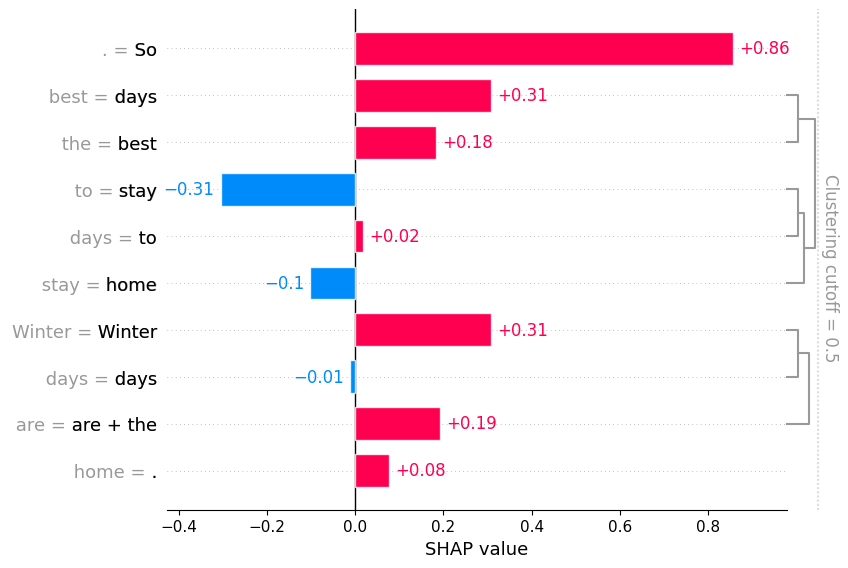

In [ ]:
shap.plots.bar(shapy_values[0,:,"looking"])